<a href="https://colab.research.google.com/github/mttcrn/AI-things/blob/main/Deep%20Learning/01-BinaryClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing keras and the required libraies

In [ ]:
# Numpy is Python standard library for tensor manipulation
import numpy as np
# Seeding numpy random number generator for results reproducibility
np.random.seed(0)

# Matplotlib will be used for all plotting tasks
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.9.2
Using keras version 2.9.0


# Generating a dataset of non linearly separable points in a bidimensional feature space

((1000,), (1000, 2))

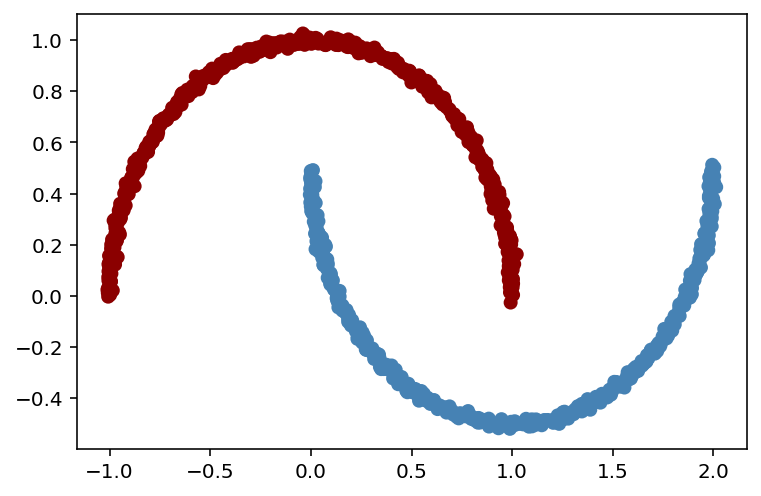

In [ ]:
# Sklearn will be used to generate our synthetic dataset
from sklearn import datasets

# Generate a population of 1000 samples with some noise
X, y = datasets.make_moons(n_samples=1000, noise=0.01, shuffle=True)

colors = ['steelblue' if label == 1 else 'darkred' for label in y]
plt.scatter(X[:,0], X[:,1], color=colors)
y.shape, X.shape

#Defining the neural network architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# Define our model object
model = Sequential()

# Fully connected neural network with one or more layers with sigmoid
# activation functions.
model.add(Dense(4, input_dim=2, activation='sigmoid'))

model.add(Dense(2, input_dim=4, activation='sigmoid'))

model.add(Dense(1, input_dim=2, activation='sigmoid'))

Instantiating a SGD optimizer and compiling the model

In [ ]:
# Optimizer modules provide a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradients

# Defining our SGD (stokastic gradient descent) optimizer
# Experiment with different learning rates and observe how the training evolves
sgd = optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
# Compiling a model in Keras amounts to associating the optimizer to a model with an appropriate loss function
model.compile(optimizer=sgd, loss='mse', metrics = ['accuracy'])

# Have look at the model topology
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


#Training the network

In [ ]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 100
# We restrict the training to n_train_samples images to cut time
n_train_samples = 1000
# This is where the actual training happens (no test dataset is considered in this case)
# batch_size is 32 by default
history = model.fit(X[:n_train_samples], y[:n_train_samples], verbose=1, epochs=epochs, shuffle=True)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.7630
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.7640
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.7650
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1753 - accuracy: 0.7670
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.7650
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1746 - accuracy: 0.7670
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1743 - accuracy: 0.7660
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.7650
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1736 - accuracy: 0.7670
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1733 - accuracy: 0.7680
Epoch 11/

# Evaluating the trained network

dict_keys(['loss', 'accuracy'])


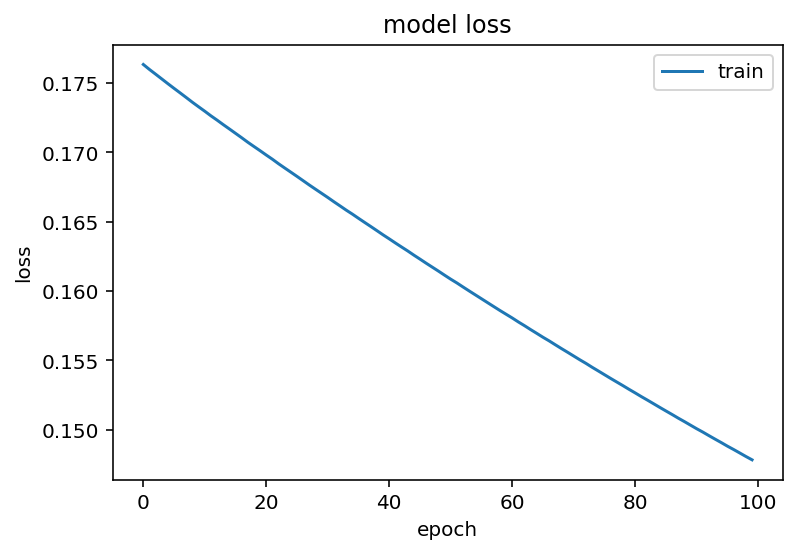

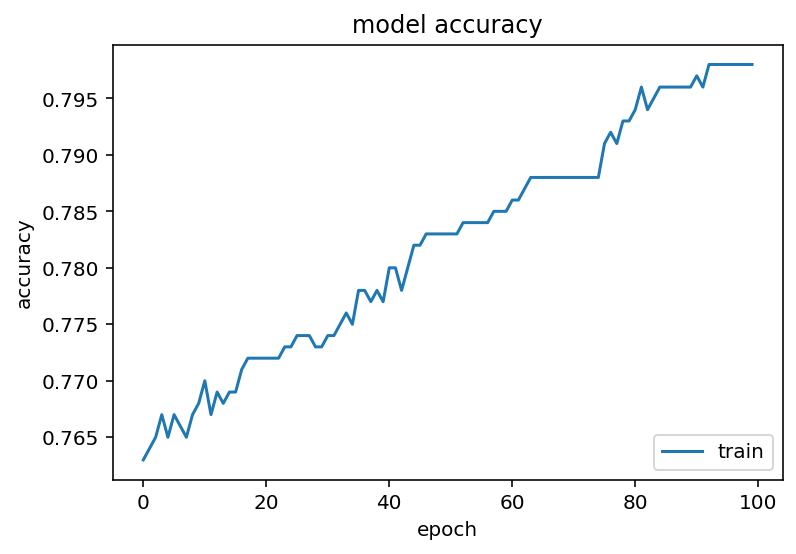

In [ ]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Visualizing the decision plane learned by the network

In [ ]:
# This function plots the output of the output neuron as a function of the network inputs
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax


32/32 [==============================] - 0s 1ms/step


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe3551c53d0>)

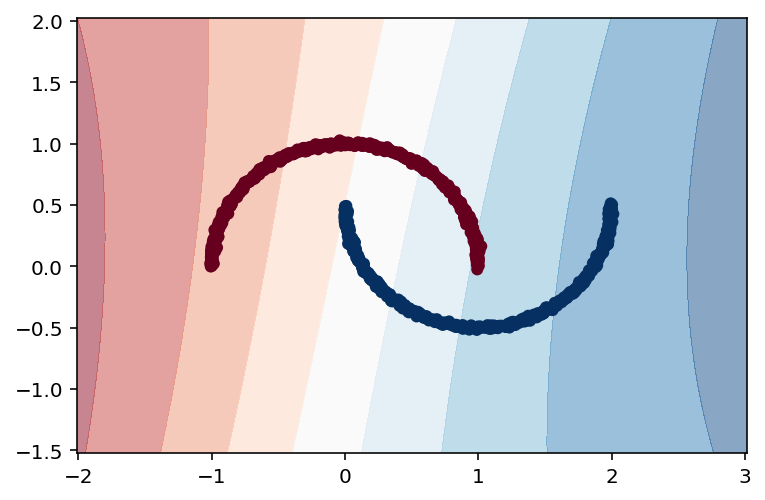

In [ ]:
plot_decision_boundary(X, y, model, cmap='RdBu')